{'SLC29A1': 3.67, 'PFKL': 2.62, 'EPHX2': 2.53, 'CUTA': 2.42, 'AIFM1': 2.38, 'RBP1': 2.35, 'SGPL1': 2.31, 'MFSD10': 2.3, 'SCARB2': 2.26, 'O43169': 2.01, 'SLC25A20': 1.86, 'PFKM': 1.86, 'EPHX1': 1.79, 'TCF25': 1.67, 'SCARB1': 1.61, 'PIK3C3': 1.41, 'RTN3': 1.39, 'PRCP': 1.38, 'APMAP': 1.32, 'HMOX2': 1.28, 'BRD7': 1.25, 'ADK': 1.22, 'TOMM22': 1.2, 'PCYOX1L': 1.16, 'NDUFS3': 1.16, 'TIMM17B': 1.13, 'CLCN3': 0.99, 'NUCB2': 0.99, 'ALDH1B1': 0.97, 'SLC16A1': 0.84, 'NENF': 0.84, 'SCPEP1': 0.83, 'KDELR1': 0.83, 'ECE1': 0.77, 'EBP': 0.76, 'HMOX1': 0.75, 'MRPL55': 0.74, 'PCYOX1': 0.73, 'STX12': 0.73, 'CIRBP': 0.72, 'COX4I1': 0.66, 'CALU': 0.65, 'HSD17B11': 0.64, 'OCIAD1': 0.64, 'CLN5': 0.62, 'CPVL': 0.6, 'HNRNPH3': 0.58, 'ZMPSTE24': 0.58, 'SSR1': 0.57, 'O75477': 0.56}


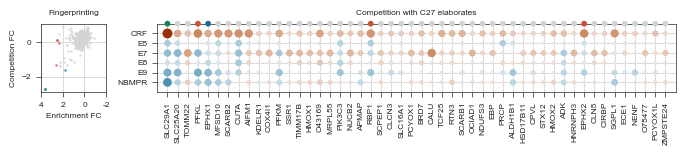

In [17]:
import pandas as pd
import numpy as np
import stylia
from stylia import NamedColors, ContinuousColorMap
from stylia import TWO_COLUMNS_WIDTH, ONE_COLUMN_WIDTH

dc = pd.read_csv("../data/competitome_2304.tsv", sep="\t")
dc_ = dc[dc["fp_parent_fragment"] == "C027"]

dc_ = dc_.sort_values(by="fp_Number_of_Protein_Unique_Peptides", ascending=False)
dc_ = dc_.sort_values(by="enrichment_log2_ratio", ascending=False)
dc_ = dc_[dc_["fp_Number_of_Protein_Unique_Peptides"] >= 2]

identifiers = [
 'PC_C27_E5_20x',
 'PC_C27_E7_20x',
 'PC_C27_E8_10x',
 'PC_C27_E9_20x',
 'NBMPR_20x']

synonyms = [
    'E5',
    'E7',
    'E8',
    'E9',
    'NBMPR']

fig, axs = stylia.create_figure(1,2, width=TWO_COLUMNS_WIDTH*0.96, height=ONE_COLUMN_WIDTH/2.3, width_ratios=[1, 8])
ax = axs.next()
stylia.label(ax, xlabel="Enrichment FC", ylabel="Competition FC", title="Fingerprinting")
d = dc_[dc_["fp_fragment"] == identifiers[4]]

c = NamedColors()

d_ = d[(d["enrichment"] == "enriched")]
d_ = d_[d_["competition"] == "not competed"]
x = d_["log2_inverted_enr_ratio"]
y = d_['competition_log2_ratio']
red_genes = set(d_["fp_Gene_Symbol"].tolist())
ax.scatter(x,y, s=3, lw=0, color=c.red, zorder=2, alpha=0.8)

d_ = d[(d["enrichment"] == "not enriched")]
d_ = d_[d_["competition"] == "competed"]
x = d_["log2_inverted_enr_ratio"]
y = d_['competition_log2_ratio']
blue_genes = set(d_["fp_Gene_Symbol"].tolist())
ax.scatter(x,y, s=3, lw=0, color=c.blue, zorder=3, alpha=0.8)

d_ = d[(d["enrichment"] == "enriched")]
d_ = d_[d_["competition"] == "competed"]
x = d_["log2_inverted_enr_ratio"]
y = d_['competition_log2_ratio']
green_genes = set(d_["fp_Gene_Symbol"].tolist())
ax.scatter(x,y, s=5, lw=0, color=c.green, zorder=4, alpha=0.8)

d_ = d[(d["enrichment"] == "not enriched")]
d_ = d_[d_["competition"] == "not competed"]
x = d_["log2_inverted_enr_ratio"]
y = d_['competition_log2_ratio']
ax.scatter(x,y, s=3, lw=0, color=c.gray, zorder=1, alpha=0.8)

ax.set_xticks([-4, -2,  0, 2])
ax.set_xticklabels([4, 2, 0, -2])

ax = axs.next()

import collections
protein_values = collections.defaultdict(list)
for r in dc_[["fp_Gene_Symbol", "enrichment_log2_ratio"]].values:
    protein_values[r[0]] += [r[1]]
protein_values = dict((k, np.mean(v)) for k,v in protein_values.items())
protein_values = sorted(protein_values.items(), key=lambda x: -x[1])[:100]

dc_ = dc_[dc_["fp_Gene_Symbol"].isin([x[0] for x in protein_values])]

protein_values = dict((k, [v]) for k,v in protein_values)
for r in dc_[["fp_Gene_Symbol", "competition_log2_ratio"]].values:
    protein_values[r[0]] += [np.abs(r[1])]

protein_values = dict((k, np.sum(v)) for k,v in protein_values.items())
protein_values = sorted(protein_values.items(), key=lambda x: -x[1])[:50]

sorted_genes = [x[0] for x in protein_values]

d = dc_

e_values = np.linspace(-4, 4, 100)
cmap_e = ContinuousColorMap("coolwarm", transformation="normal")
cmap_e.fit(e_values)
f_values = np.linspace(-4, 4, 100)
cmap_f = ContinuousColorMap("coolwarm", transformation="normal")
cmap_f.fit(f_values)

coordinates = {}
for i, identifier in enumerate(identifiers):
    for j, gene_name in enumerate(sorted_genes):
        coordinates[(identifier, gene_name)] = (i+1,j)

identifiers = ["CRF"] + identifiers

for i, identifier in enumerate(identifiers):
    if i == 0:
        d_ = d[d['fp_fragment'] == identifiers[-1]]
        d_ = d_[d_["fp_Gene_Symbol"].isin(sorted_genes)]
        x = []
        y = []
        v = []
        v_dict = {}
        for gn, v_ in d_[["fp_Gene_Symbol", "enrichment_log2_ratio"]].values:
            v_dict[gn] = v_
        print(v_dict)
        v = [v_dict[gn] for gn in sorted_genes]
        y = [0]*len(v)
        x = [i for i in range(len(sorted_genes))]
        f = 10
        colors = cmap_f.transform(v)
    else:
        d_ = d[d['fp_fragment'] == identifier]
        d_ = d_[d_["fp_Gene_Symbol"].isin(sorted_genes)]
        x = []
        y = []
        v = []
        for gn, v_ in d_[["fp_Gene_Symbol", "competition_log2_ratio"]].values:
            y += [i]
            x += [coordinates[(identifier, gn)][1]]
            v += [v_]
        f = 10
        colors = cmap_e.transform(v)
    ax.scatter(x,y, color=colors, s=np.abs(v)*f+1)

ax.set_xticks([j for j in range(len(sorted_genes))])
ax.set_xticklabels(sorted_genes, rotation=90, ha="center")
ax.set_yticks([i for i in range(len(identifiers))])
ax.set_yticklabels(["CRF"] + synonyms)
ax.set_ylim(len(identifiers), -1)
ax.set_xlim(-1, 50)

stylia.label(ax, xlabel="", ylabel="", title="Competition with C27 elaborates")

x = []
y = []
c = []
for i, gn in enumerate(sorted_genes):
    y += [-1]
    x += [i]
    if gn in green_genes:
        c += [NamedColors().green]
    elif gn in red_genes:
        c += [NamedColors().red]
    elif gn in blue_genes:
        c += [NamedColors().blue]
    else:
        c += [NamedColors().gray]
ax.scatter(x, y, color=c, clip_on=False, zorder = 100000)

stylia.save_figure("../assets/Figure04_BC.png")
stylia.save_figure("../assets/Figure04_BC.pdf")

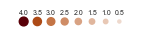

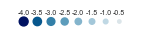

In [21]:
fig, axs = stylia.create_figure(1,1, width=ONE_COLUMN_WIDTH/2.5, height=ONE_COLUMN_WIDTH/10)
ax = axs.next()
v = np.arange(0.5, 4.5, 0.5)
f = 10
colors = cmap_f.transform(v)
ax.scatter([i for i in range(len(v))], [0]*len(v), s=v*f, color=colors)
ax.set_xlim(len(v),-1)
ax.set_ylim(-1, 1.3)
for i in range(len(v)):
    ax.text(i, 1.2, np.round(v[i], 1), va="center", ha="center")
ax.set_axis_off()
stylia.label(ax, xlabel="", ylabel="", title="")
stylia.save_figure("../assets/Figure04_C_legend_a.png")
stylia.save_figure("../assets/Figure04_C_legend_a.pdf")

fig, axs = stylia.create_figure(1,1, width=ONE_COLUMN_WIDTH/2.5, height=ONE_COLUMN_WIDTH/10)
ax = axs.next()
v = np.arange(-4, 0, 0.5)
f = 10
colors = cmap_e.transform(v)
ax.scatter([i for i in range(len(v))], [0]*len(v), s=np.abs(v)*f+1, color=colors)
for i in range(len(v)):
    ax.text(i, 1.2, np.round(v[i], 1), va="center", ha="center")
ax.set_xlim(-1, len(v))
ax.set_ylim(-1, 1.3)

ax.set_axis_off()
stylia.label(ax, xlabel="", ylabel="", title="")
stylia.save_figure("../assets/Figure04_C_legend_b.png")
stylia.save_figure("../assets/Figure04_C_legend_b.pdf")